In [1]:
from model import *

%load_ext autoreload
%autoreload 2

In [89]:
model = load_model('sat_unet_final.hdf5', compile=False)
# model=load_model('pretrained_unet2.hdf5', compile = False)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 256, 256, 64) 256         conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 64) 36928       batch_normalization[0][0]        
______________________________________________________________________________________________

https://github.com/keisen/tf-keras-vis/blob/master/examples/attentions.ipynb

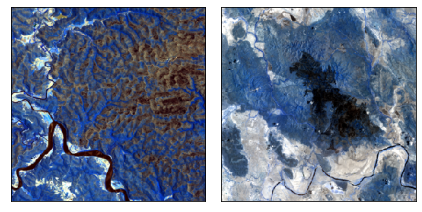

In [110]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.vgg16 import preprocess_input

# Load images
img1 = load_img('dataset/test_images/2MSI_20191226_S2-5.png', target_size=(256, 256))
img2 = load_img('dataset/images_satellite/MSI_20191224_S2.png', target_size=(256, 256))
images = np.asarray([np.array(img1), np.array(img2)])

# Prepare datasets
X = preprocess_input(images)

# Render
subprot_args = {
    'nrows': 1,
    'ncols': 2,
    'figsize': (6, 3),
    'subplot_kw': {'xticks': [], 'yticks': []}
}
f, ax = plt.subplots(**subprot_args)
for i in range(len(images)):
    ax[i].imshow(images[i])
plt.tight_layout()
plt.show()

In [92]:
def loss(output):
    return (output[0][:], output[1][:])

# Define modifier to replace a softmax function of the last layer to a linear function.
def model_modifier(m):
    m.layers[-1].activation = tf.keras.activations.linear
    return m

## Vanilla Saliency

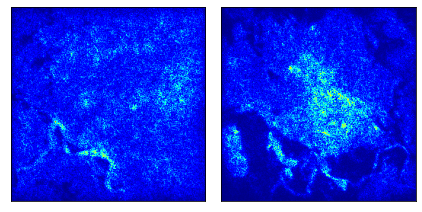

In [111]:
from tensorflow.keras import backend as K
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils import normalize

# Create Saliency object
saliency = Saliency(model, model_modifier, clone=False)

# Generate saliency map
saliency_map = saliency(loss, X)
saliency_map = normalize(saliency_map)

f, ax = plt.subplots(**subprot_args)
for i in range(len(saliency_map)):
    ax[i].imshow(saliency_map[i], cmap='jet')
plt.tight_layout()
plt.show()

## SmoothGrad

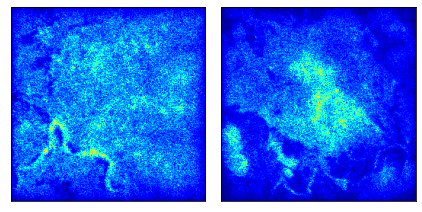

In [112]:
# Generate saliency map with smoothing that reduce noise by adding noise
saliency_map = saliency(loss, X, smooth_samples=3)
saliency_map = normalize(saliency_map)

f, ax = plt.subplots(**subprot_args)
for i in range(len(saliency_map)):
    ax[i].imshow(saliency_map[i], cmap='jet')
plt.tight_layout()
plt.show()

## GradCAM

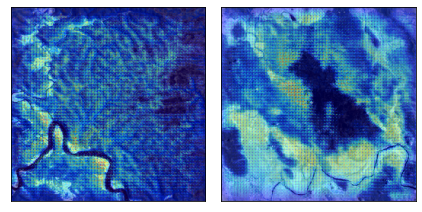

In [113]:
from matplotlib import cm
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.utils import normalize

# Create Gradcam object
gradcam = Gradcam(model, model_modifier, clone=False)

# Generate heatmap with GradCAM
cam = gradcam(loss, X)
cam = normalize(cam)

f, ax = plt.subplots(**subprot_args)
for i in range(len(cam)):
    heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
    ax[i].imshow(images[i])
    ax[i].imshow(heatmap, cmap='jet', alpha=0.5)
plt.tight_layout()
plt.show()

In [114]:
from data import *
import os
X_test,names=test("dataset/images_satellite")
names = ["finalsatT" + name for name in names]
preds=model.predict(X_test)
preds=preds>0.5
results=predToImgs(preds)
saveResults(os.getcwd()+"/dataset/predict",results,names,empty_dir=False)

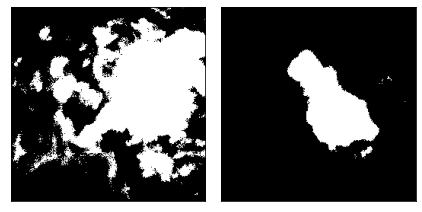

In [116]:
# Load images
# img1 = load_img('dataset/test_images/2MSI_20191226_S2-5.png', target_size=(256, 256))
# img2 = load_img('dataset/test_images/2MSI_20191226_S2-6.png', target_size=(256, 256))
# images = np.asarray([np.array(img1), np.array(img2)])

img1 = load_img('dataset/predict/finalsat2MSI_20191226_S2-5_predict.png', target_size=(256, 256))
img2 = load_img('dataset/predict/finalsatTMSI_20191224_S2_predict.png', target_size=(256, 256))
images = np.asarray([np.array(img1), np.array(img2)])

# Prepare datasets
X = preprocess_input(images)

# Render
subprot_args = {
    'nrows': 1,
    'ncols': 2,
    'figsize': (6, 3),
    'subplot_kw': {'xticks': [], 'yticks': []}
}
f, ax = plt.subplots(**subprot_args)
for i in range(len(images)):
    ax[i].imshow(images[i])
plt.tight_layout()
plt.show()